In [1]:
import torch
import numpy as np
from torch import nn
import torchvision as ptv
from PIL import Image as PILImage
from glob import glob
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, Resize, Normalize, ToTensor
from diffaug.pytorch import (
    RandomBrightness,
    RandomContrast,
    RandomContrast,
    RandomCutout,
    RandomSaturation,
    RandomTranslation,
)
from diffaug.pytorch import functional as DF
import copy

In [2]:
IMAGE_DIR = "./data/test1/*.jpg"


In [3]:
images = glob(IMAGE_DIR)[:10]
images = [PILImage.open(path) for path in images]

In [4]:
class SampleImages(Dataset):
    def __init__(self, images, transformation):
        self.images = images
        self.transformation = transformation

    def __len__(self):
        return len(self.images)

    def __getitem__(self, i):
        image = self.images[i]
        image_tensor = self.transformation(image)
        return image_tensor


In [5]:
trans = Compose(
    [
        Resize((224, 224)),
        ToTensor(),
        Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)
dataet = SampleImages(images, transformation=trans)
dl = DataLoader(dataet,batch_size=4)

/home/yslee/miniconda3/envs/kaggle/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


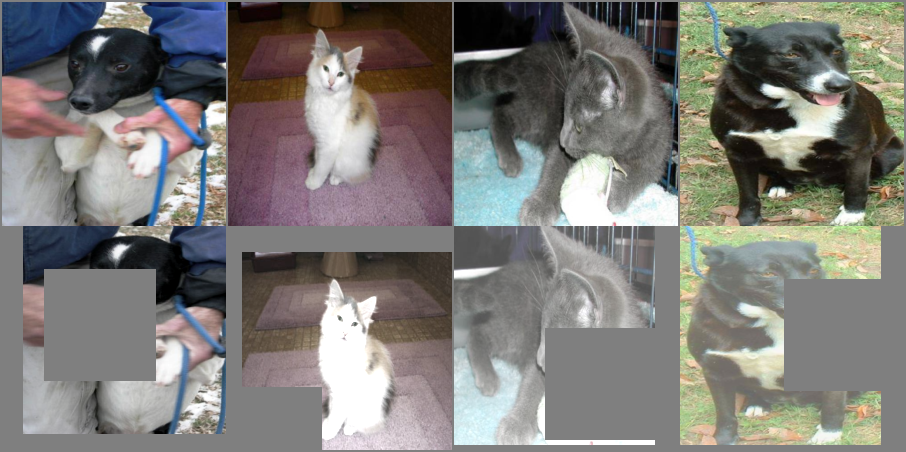

In [6]:
diff_aug = nn.Sequential(
    RandomBrightness(),
    RandomContrast(),
    RandomCutout(),
    RandomSaturation(),
    RandomTranslation(),
)

images = next(iter(dl))
images_ = diff_aug(images.requires_grad_(True))
print(images_.grad_fn)
images = torch.cat([images, images_], dim=2)
images = (ptv.utils.make_grid(images, nrow=4) + 1) / 2
images = torch.clip(images, 0, 1)
display(ptv.transforms.functional.to_pil_image(images))


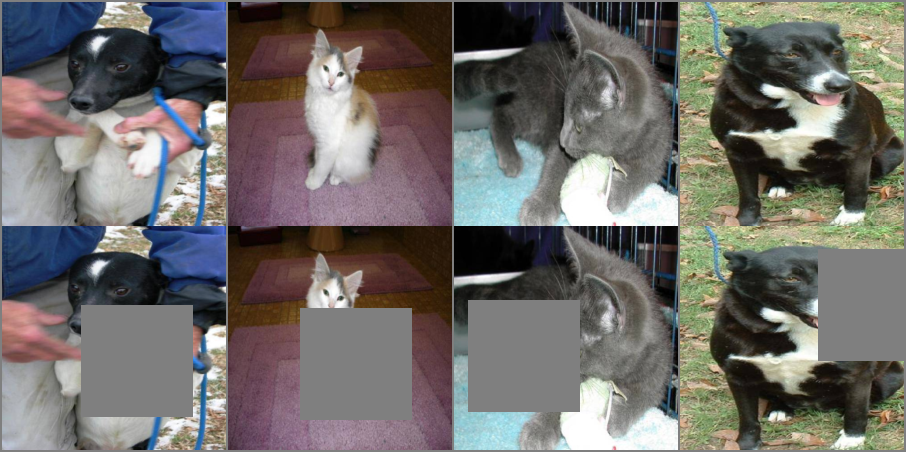

In [7]:
images = next(iter(dl))
images_ = DF.random_cutout(images.requires_grad_(True))
print(images_.grad_fn)

images = torch.cat([images, images_], dim=2)
images = (ptv.utils.make_grid(images, nrow=4) + 1) / 2
images = torch.clip(images, 0, 1)
display(ptv.transforms.functional.to_pil_image(images))